### Frames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data from the file
df = pd.read_csv('./Hbond_Contacts/Mutant_SusD.dat', sep='\s+')
# Create a new list for the updated column names
new_columns = df.columns[1:].tolist() + ['']
# Update the DataFrame's column names
df.columns = new_columns
# Remove '#' from first column name
df.columns = [col.replace('#', '') for col in df.columns]
# Remove the last column
df = df.iloc[:, :-1]
# Sort by 'Residue' in ascending numerical order
df_sorted = df.sort_values(by='Residue')
# Print the column names
#print(df_sorted.head())


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5530/2185549231.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('./Hbond_Contacts/Mutant_SusD.dat', sep='\s+')


In [5]:
# Extract unique residues and frames
residues = df_sorted['Residue'].unique()
frames = df_sorted['Frame'].unique()

# Create a matrix to store the number of contacts per residue per frame
contact_matrix = np.zeros((len(residues), len(frames)))

# Populate the contact matrix
for index, row in df.iterrows():
    residue_index = np.where(residues == row['Residue'])[0][0]
    frame_index = np.where(frames == row['Frame'])[0][0]
    contact_matrix[residue_index, frame_index] += 1

# Plotting

# Plot the total number of contacts per frame
#plt.subplot(2, 1, 1)
#plt.plot(frames, contact_matrix.sum(axis=0), label='Total Contacts')
#plt.xlabel('Time (nsec)')
#plt.ylabel('Total Contacts')
#plt.title('Timeline of Protein-Ligand Contacts')
#plt.legend()

# Plot the residue-specific contacts
#plt.subplot(2, 1, 2)
plt.figure(figsize=(14, 12), dpi=900)
plt.imshow(contact_matrix, aspect='auto', cmap='Oranges', interpolation='none')

plt.title('Mutant SusD Protein-Ligand Contacts', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Time (nsec)', fontsize=14, fontweight='bold')
plt.ylabel('Residue Number', fontsize=14, fontweight='bold')

# Set x-ticks with frame indices or you can adjust as needed
#plt.xticks(np.arange(len(frames)), frames, rotation=90)
plt.yticks(np.arange(len(residues)), residues)
# Increase tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# Increase legend font size
#legend = ax.legend(fontsize=15, title_fontsize=15)

cbar = plt.colorbar()
cbar.set_label('Number of Contacts', fontsize=15, fontweight='bold')
cbar.ax.tick_params(labelsize=14)  # Increase colorbar tick label size

plt.tight_layout()
plt.savefig('./Mutant_Hbonds_graph.pdf', format='pdf')
#plt.show()


### Time (ns)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4201/2067115111.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('./Hbond_Contacts/Mutant_SusD.dat', sep='\s+')


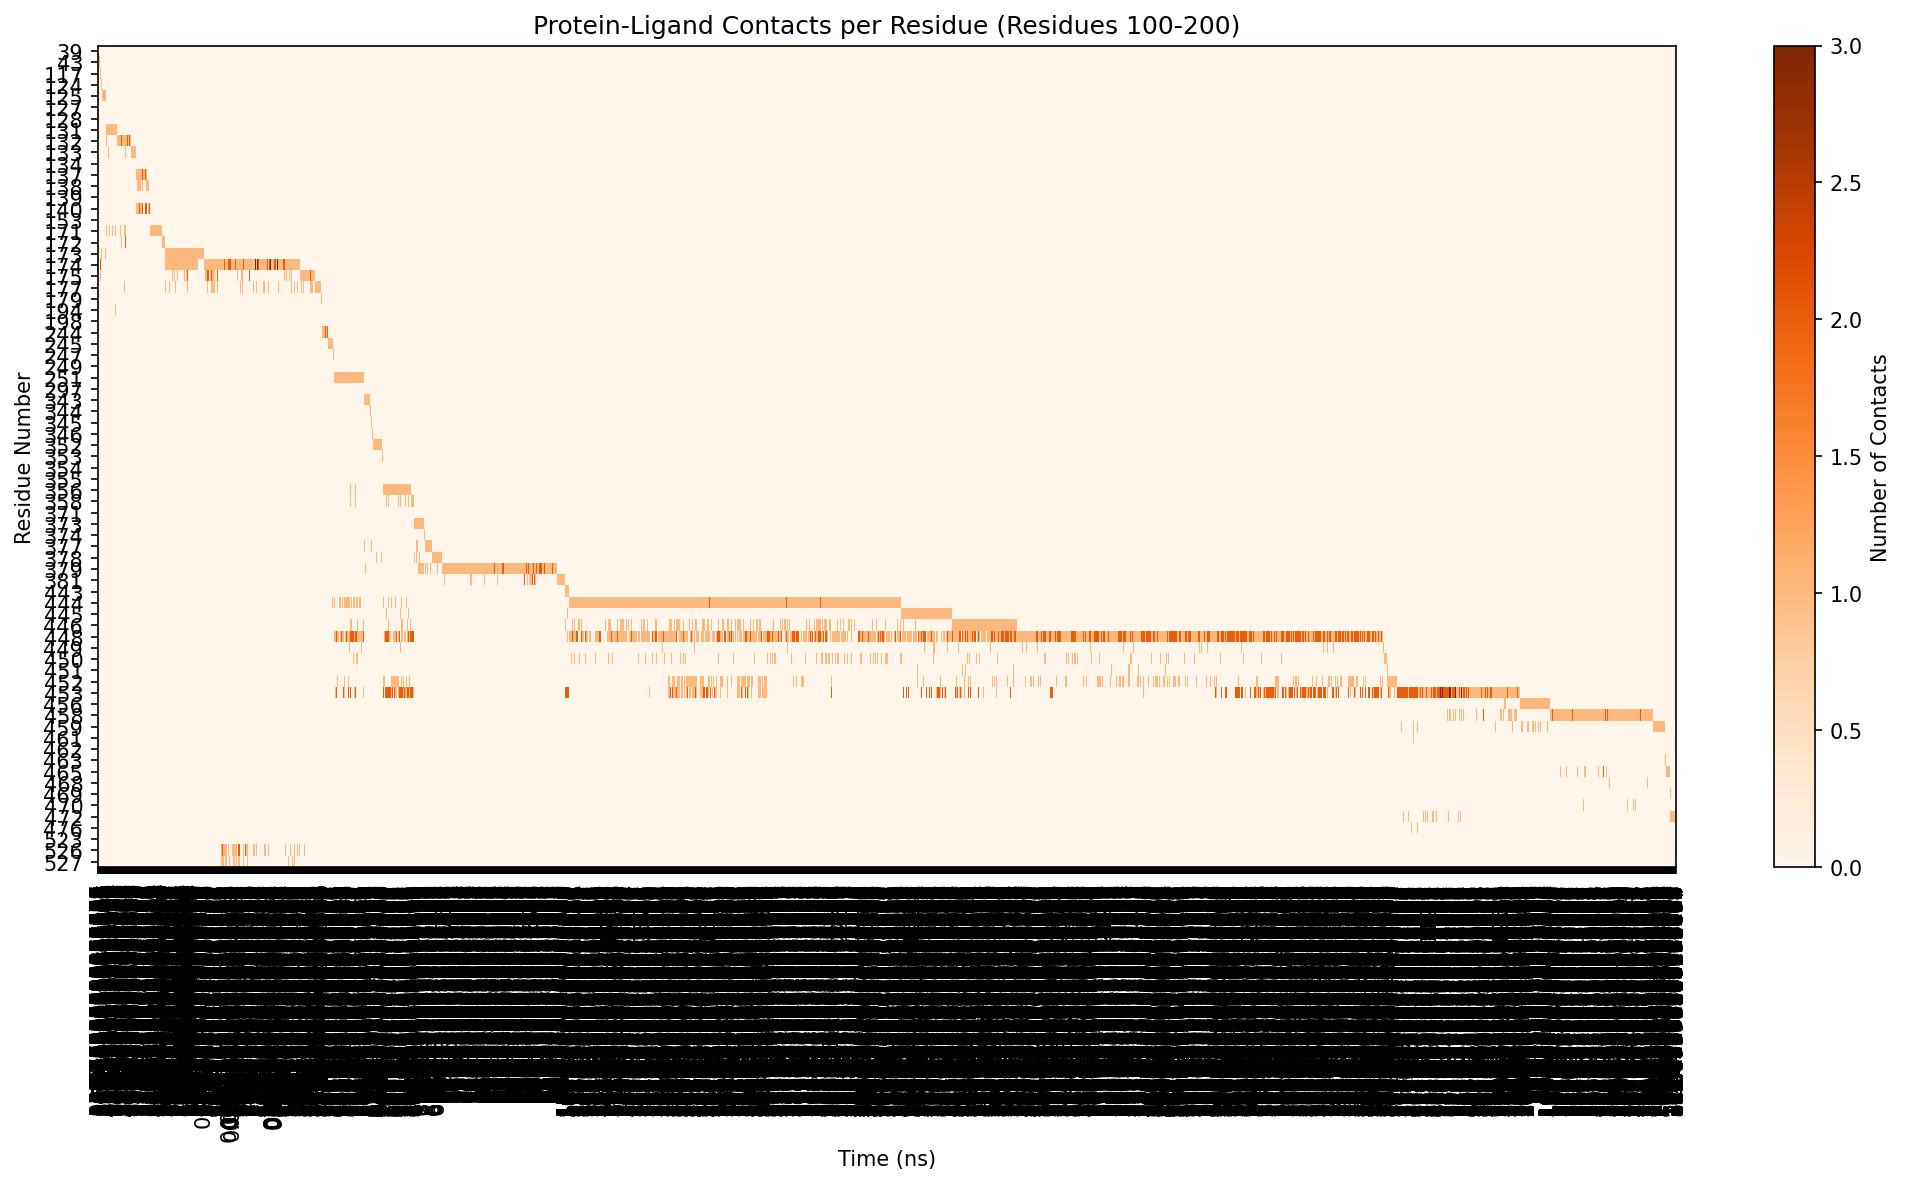

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the file is re-uploaded and processed similarly as before
df = pd.read_csv('./Hbond_Contacts/Mutant_SusD.dat', sep='\s+')

# Create a new list for the updated column names
new_columns = df.columns[1:].tolist() + ['']
# Update the DataFrame's column names
df.columns = new_columns
# Remove '#' from first column name
df.columns = [col.replace('#', '') for col in df.columns]
# Remove the last column
df = df.iloc[:, :-1]
# Sort by 'Residue' in ascending numerical order
df_sorted = df.sort_values(by='Residue')

# Convert frames to time (200 ns simulation, total number of frames divided by the time in ns)
total_simulation_time_ns = 200  # ns
time_per_frame_ns = total_simulation_time_ns / len(frames)  # ns per frame
time = frames * time_per_frame_ns  # Convert frames to time

# Create a matrix to store the number of contacts per residue per frame
contact_matrix = np.zeros((len(residues), len(frames)))

# Create dictionaries for faster index lookups
residue_index_map = {res: idx for idx, res in enumerate(residues)}
frame_index_map = {frame: idx for idx, frame in enumerate(frames)}

# Populate the contact matrix
for index, row in df_sorted.iterrows():
    residue_index = residue_index_map[row['Residue']]
    frame_index = frame_index_map[row['Frame']]
    contact_matrix[residue_index, frame_index] += 1

# Plotting with increased figsize and dpi
plt.figure(figsize=(14, 8), dpi=150)  # Increased size and DPI

# Plot the residue-specific contacts
plt.imshow(contact_matrix, aspect='auto', cmap='Oranges', interpolation='none')

plt.title('Protein-Ligand Contacts per Residue (Residues 100-200)')
plt.xlabel('Time (ns)')
plt.ylabel('Residue Number')

# Set y-ticks with residue numbers
plt.yticks(np.arange(len(residues)), residues)

# Set x-ticks with the converted time values
plt.xticks(np.arange(len(frames)), time, rotation=90)

# Add a color bar to indicate the number of contacts
plt.colorbar(label='Number of Contacts')

plt.tight_layout()
plt.show()


### frame to time

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_36794/1311399213.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('./Hbond_Contacts/Mutant_SusD.dat', sep='\s+')


      Frame  Residue Chain ResName AtomName LigandFragment LigandAtomName
3231   2642       39     A     ASN     HD21       L-FRAG_0            O55
3237   2646       39     A     ASN        O       L-FRAG_0            H50
3183   2591       43     A     ASN      OD1       L-FRAG_0            H50
3168   2573       43     A     ASN      OD1       L-FRAG_0            H45
3170   2574       43     A     ASN      OD1       L-FRAG_0            H45


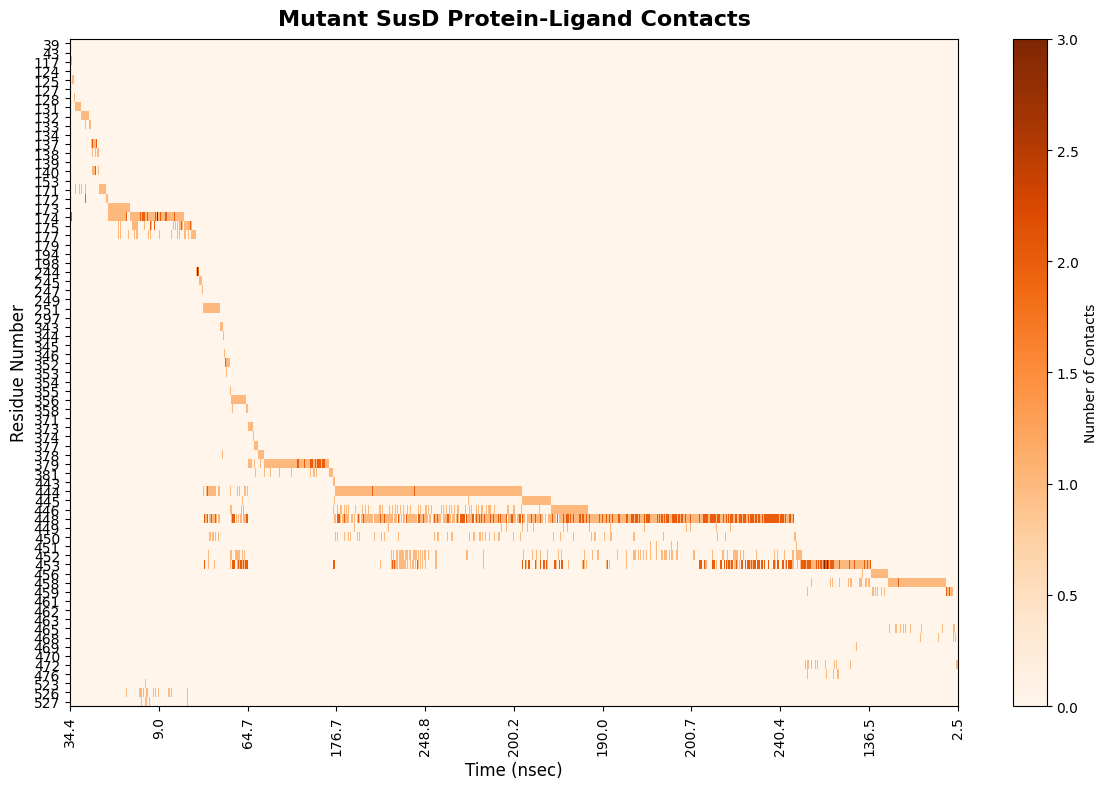

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
df = pd.read_csv('./Hbond_Contacts/Mutant_SusD.dat', sep='\s+')

# Create a new list for the updated column names
new_columns = df.columns[1:].tolist() + ['']
# Update the DataFrame's column names
df.columns = new_columns
# Remove '#' from first column name
df.columns = [col.replace('#', '') for col in df.columns]
# Remove the last column
df = df.iloc[:, :-1]
# Sort by 'Residue' in ascending numerical order
df_sorted = df.sort_values(by='Residue')
# Print the column names
print(df_sorted.head())

# Extract unique residues and frames
residues = df_sorted['Residue'].unique()
frames = df_sorted['Frame'].unique()

# Total simulation time in nanoseconds
total_time_ns = 200
# Calculate time per frame
time_per_frame = total_time_ns / len(frames)
# Convert frames to time in nanoseconds
times = frames * time_per_frame

# Create a matrix to store the number of contacts per residue per frame
contact_matrix = np.zeros((len(residues), len(frames)))

# Populate the contact matrix
for index, row in df.iterrows():
    residue_index = np.where(residues == row['Residue'])[0][0]
    frame_index = np.where(frames == row['Frame'])[0][0]
    contact_matrix[residue_index, frame_index] += 1

# Plotting

# Plot the total number of contacts per frame
#plt.subplot(2, 1, 1)
#plt.plot(time_ns, contact_matrix.sum(axis=0), label='Total Contacts')
#plt.xlabel('Time (nsec)')
#plt.ylabel('Total Contacts')
#plt.title('Timeline of Protein-Ligand Contacts')
#plt.legend()

# Plot the residue-specific contacts
plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(contact_matrix, aspect='auto', cmap='Oranges', interpolation='none')

plt.title('Mutant SusD Protein-Ligand Contacts', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Time (nsec)', fontsize=12)
plt.ylabel('Residue Number', fontsize=12)

# Set x-ticks with time values
# Reduce the number of ticks for better readability
num_ticks = 10  # Adjust this number as needed
step = len(times) // num_ticks
plt.xticks(np.arange(0, len(times), step), [f"{times[i]:.1f}" for i in range(0, len(times), step)], rotation=90)

plt.yticks(np.arange(len(residues)), residues)

plt.colorbar(label='Number of Contacts')

plt.tight_layout()
plt.savefig('./Ligand_RMSD_graph.png')
plt.show()
